In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# import wave 19 (post election) panel data
df_18 = pd.read_spss('./data/wave18.sav')
df_19 = pd.read_spss('./data/wave19.sav')
df_backup18 = df_18.copy()
df_backup19 = df_19.copy()

In [3]:
#reset df
df_18 = df_backup18.copy()
df_19 = df_backup19.copy()

In [4]:
# for i in df_18.columns:
#     print(i)

### Target variable cleaning

In [5]:
#drop rows of participants who did not vote for one of the major parties
df_19.drop(df_19[df_19['generalElectionVote'] == 'An independent candidate'].index, axis=0, inplace = True)
df_19.drop(df_19[df_19['generalElectionVote'] == 'Other'].index, axis=0, inplace = True)
df_19.drop(df_19[df_19['generalElectionVote'] == "Don't know"].index, axis=0, inplace = True)
df_19['generalElectionVote'] = df_19['generalElectionVote'].cat.remove_unused_categories()

df_18.drop(df_18[df_18['generalElectionVote'] == 'An independent candidate'].index, axis=0, inplace = True)
df_18.drop(df_18[df_18['generalElectionVote'] == 'Other'].index, axis=0, inplace = True)
df_18.drop(df_18[df_18['generalElectionVote'] == "Don't know"].index, axis=0, inplace = True)
df_18['generalElectionVote'] = df_18['generalElectionVote'].cat.remove_unused_categories()

In [6]:
#drop rows of participants who did not know if they voted
#replace nans with DNV label
df_18['generalElectionVote'].replace({'I would/did not vote': 'DNV'}, inplace=True)
#     df['generalElectionVote'] = df['generalElectionVote'].cat.add_categories("DNV")
df_18['generalElectionVote'].fillna('DNV', inplace=True)
df_18.rename(columns={'generalElectionVote': 'predictVote'}, inplace=True)
    
df_19.drop(df_19[df_19['p_turnout_2019'] == "Don't know"].index, axis=0, inplace = True)
df_19.drop(df_19[df_19['p_turnout_2019'] == "nan"].index, axis=0, inplace = True)
df_19['p_turnout_2019'] = df_19['p_turnout_2019'].cat.remove_unused_categories()
#replace nans with DNV label
df_19['generalElectionVote'] = df_19['generalElectionVote'].cat.add_categories("DNV")
df_19['generalElectionVote'].fillna('DNV', inplace=True)
df_19.rename(columns={'generalElectionVote': 'actualVote'}, inplace=True)

In [7]:
#create new dataframe with merged columns
df_19 = df_19.filter(['id', 'actualVote'])
df = pd.merge(df_18, df_19, on='id')
df_backup = df.copy()

### General data cleaning

In [8]:
#reset df (make sure to comment out when running model)
# df = df_backup.copy()

In [9]:
# drop columns that are not relevant to prediction of generalElectionVote 
# drop questions that are too brexit specific (can't extrapolate)
# drop country specific questions
#drop wave19 specific questions
columns_to_drop = ['id', 'starttime', 'endtime', 'wt', 'mii', 'likeBerry', 'brexitNextPref', 'cantLiveWithEU_1', 'cantLiveWithEU_2', 'cantLiveWithEU_3',
                   'cantLiveWithEU_4', 'cantLiveWithEU_None', 'scotReferendumIntention', 'partyContact1', 'partyContactCon', 'partyContactLab',
                   'partyContactLD', 'partyContactSNP', 'partyContactPC', 'partyContactBrexit', 'partyContactGrn', 'partyContactUKIP',
                   'partyContact2new_13', 'partyContactOtherParty', 'partyContactNone', 'partyContactCon_1', 'partyContactCon_2', 'partyContactCon_3',
                   'partyContactCon_4', 'partyContactCon_5', 'partyContactCon_6', 'partyContactCon_7', 'partyContactLab_1', 'partyContactLab_2',
                   'partyContactLab_3', 'partyContactLab_4', 'partyContactLab_5', 'partyContactLab_6', 'partyContactLab_7', 'partyContactLD_1',
                   'partyContactLD_2', 'partyContactLD_3', 'partyContactLD_4', 'partyContactLD_5', 'partyContactLD_6', 'partyContactLD_7',
                   'partyContactSNP_1', 'partyContactSNP_2', 'partyContactSNP_3', 'partyContactSNP_4', 'partyContactSNP_5', 'partyContactSNP_6',
                   'partyContactSNP_7', 'partyContactPC_1', 'partyContactPC_2', 'partyContactPC_3', 'partyContactPC_4', 'partyContactPC_5',
                   'partyContactPC_6', 'partyContactPC_7', 'partyContactUKIP_1', 'partyContactUKIP_2', 'partyContactUKIP_3', 'partyContactUKIP_4', 
                   'partyContactUKIP_5', 'partyContactUKIP_6', 'partyContactUKIP_7', 'partyContactGreen_1', 'partyContactGreen_2', 'partyContactGreen_3',
                   'partyContactGreen_4', 'partyContactGreen_5', 'partyContactGreen_6', 'partyContactGreen_7', 'partyContactBrexit_1',
                   'partyContactBrexit_2', 'partyContactBrexit_3', 'partyContactBrexit_4', 'partyContactBrexit_5', 'partyContactBrexit_6',
                   'partyContactBrexit_7', 'partyContactInd_1', 'partyContactInd_2', 'partyContactInd_3', 'partyContactInd_4', 'partyContactInd_5',
                   'partyContactInd_6', 'partyContactInd_7', 'partyContactOther_1', 'partyContactOther_2', 'partyContactOther_3', 'partyContactOther_4',
                   'partyContactOther_5', 'partyContactOther_6', 'partyContactOther_7', 'changeView', 'selfOccStatus', 'selfOccSupervise',
                   'selfOccOrgSize', 'selfOccEmployees', 'selfNumEmployees', 'selfOccStatusLast', 'selfOccSuperviseLast', 'selfOccOrgSizeLast',
                   'selfOccEmployeesLast', 'selfNumEmployeesLast', 'occCheck', 'respdate', 'oslaua', 'parentNumEmployees', 'headHouseholdPast', 'pano',
                   'ageGroup', 'pcon', 'p_education_age', 'p_education', 'p_gross_personal', 'p_marital', 'p_paper_read', 'p_religion', 'p_work_stat',
                   'p_scot_const_vote_2011', 'p_scot_list_vote_2011', 'p_scot_const_vote_2016', 'p_scot_list_vote_2016', 'p_welsh_const_vote_2016',
                   'p_welsh_list_vote_2016', 'p_turnout_scot_ref', 'p_edlevelUni', 'wt_daily', 'turnoutUKGeneral','generalElectionVotePost',
                   'generalElectionVoteUnsqueeze', 'generalElectionVoteSqueeze', 'generalElectionVoteRetro2017', 'generalElectionCertaintyUnsq', 
                   'generalElectionCertaintySq', 'ns_secW16W17', 'ns_sec_analyticW16W17', 'postalTurnout', 'noChanceCoalitionLab', 'noChanceCoalitionCon',
                   'noChanceCoalitionLD', 'noChanceCoalitionSNP', 'noChanceCoalitionPC', 'noChanceCoalitionBrexit', 'noChanceCoalitionGrn',
                   'noChanceCoalitionDUP', 'noChanceCoalitionNone', 'labPartnerLD', 'labPartnerSNP', 'labPartnerPC', 'labPartnerGreen',
                   'labPartnerBrexit', 'conPartnerLD', 'conPartnerSNP', 'conPartnerPC', 'conPartnerGreen', 'conPartnerBrexit', 'conCampaignGoing',
                   'labCampaignGoing', 'ldCampaignGoing', 'brexCampaignGoing', 'winConstituencyInd', 'constituencyWinReason1', 'constituencyWinReason2',
                   'constituencyWinReason3', 'constituencyWinReason4', 'constituencyWinReason5', 'constituencyWinReason6', 'constituencyWinReason7',
                   'constituencyWinReason8', 'constituencyWinReason9', 'constituencyWinReason10', 'constituencyWinReason11', 'constituencyWinReason12',
                   'constituencyWinReason13', 'constituencyWinReason111', 'conUnited', 'labUnited', 'ldUnited', 'snpUnited', 'pcUnited', 'brexitUnited',
                   'grnUnited','EUIntegrationJohnson', 'EUIntegrationCorbyn', 'dealVremain', 'conBrexPref', 'labBrexPref', 'ldBrexPref',
                   'snpBrexPref', 'pcBrexPref', 'greenBrexPref', 'brexitBrexPref', 'mpBrexitView', 'handleEUNegotiate', 'achieveReduceImmigLD',
                   'achieveReduceImmigSNP', 'achieveReduceImmigPC', 'achieveReduceImmigGrn', 'achieveReduceImmigBrexit', 'achieveReduceImmigNone', 
                   'ptvCon', 'ptvLab', 'ptvLD', 'ptvSNP', 'ptvPC', 'ptvUKIP', 'ptvBrexitParty', 'ptvGrn', 'changeEconomy', 'changeNHS', 'changeEducation',
                   'changeEconomyLab', 'changeNHSLab', 'changeEducationLab', 'cutsTooFarNational', 'cutsTooFarNHS', 'cutsTooFarLocal', 'privatTooFar', 
                   'enviroProtection', 'scotCon', 'scotLab', 'scotLD', 'scotSNP', 'scotGrn', 'scotBrexit', 'welshCon', 'welshLab', 'welshLD', 'welshPC',
                   'welshGrn', 'welshBrexit', 'polPreferToFight', 'conTone', 'labTone', 'ldTone', 'snpTone', 'pcTone', 'brexitTone', 'grnTone',
                   'discussPolDays', 'agreeParty', 'tryConvince_1', 'tryConvince_2', 'tryConvince_3', 'tryConvince_4', 'tryConvince_5',
                   'convinceFriends_1', 'convinceFriends_2', 'convinceFriends_3', 'convinceFriends_4', 'convinceFriends_5', 'convinceFriends_12',
                   'convinceFriends_7', 'convinceFriends_6', 'convinceFriends_13', 'convinceFriends_9', 'convinceFamily_1', 'convinceFamily_2',
                   'convinceFamily_3', 'convinceFamily_4', 'convinceFamily_5', 'convinceFamily_12', 'convinceFamily_7', 'convinceFamily_6',
                   'convinceFamily_13', 'convinceFamily_9', 'convinceWork_1', 'convinceWork_2', 'convinceWork_3', 'convinceWork_4', 'convinceWork_5',
                   'convinceWork_12', 'convinceWork_7', 'convinceWork_6', 'convinceWork_13', 'convinceWork_9', 'convinceOther_1', 'convinceOther_2',
                   'convinceOther_3', 'convinceOther_4', 'convinceOther_5', 'convinceOther_12', 'convinceOther_7', 'convinceOther_6', 'convinceOther_13',
                   'convinceOther_9', 'methodFriends_1', 'methodFriends_2', 'methodFriends_3', 'methodFriends_4', 'methodFriends_5', 'methodFriends_6',
                   'methodFriends_111', 'methodFamily_1', 'methodFamily_2', 'methodFamily_3', 'methodFamily_4', 'methodFamily_5', 'methodFamily_6',
                   'methodFamily_111', 'methodWork_1', 'methodWork_2', 'methodWork_3', 'methodWork_4', 'methodWork_5', 'methodWork_6', 'methodWork_111',
                   'methodOther_1', 'methodOther_2', 'methodOther_3', 'methodOther_4', 'methodOther_5', 'methodOther_6', 'methodOther_111',
                   'debateOneWatch', 'debateTwoWatch', 'debateClimateWatch', 'debateFourWatch', 'debateFiveWatch', 'debateSixWatch', 'xtoday_date',
                   'xyesterday_date', 'xbefore_yesterday_date', 'xbefore_yesterday_day', 'S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6', 'S1_7', 'S1_8',
                   'S1_9', 'paperLastThreeDays', 'paperLast3_1', 'paperLast3_2', 'paperLast3_3', 'paperLast3_4', 'paperLast3_5', 'paperLast3_6',
                   'paperLast3_7', 'paperLast3_8', 'paperLast3_9', 'paperLast3_10', 'paperLast3_11', 'paperLast3_12', 'paperLast3_13', 'paperLast3_14',
                   'paperLast3_15', 'paperLast3_16', 'paperLast3_17', 'paperLast3_18', 'paperLast3_19', 'paperLast3_20', 'papersLastThree_multiple_99',
                   'paperDays_1_1', 'paperDays_1_2', 'paperDays_1_3', 'paperDays_1_111', 'paperDays_2_1', 'paperDays_2_2', 'paperDays_2_3',
                   'paperDays_2_111', 'paperDays_3_1', 'paperDays_3_2', 'paperDays_3_3', 'paperDays_3_111', 'paperDays_4_1', 'paperDays_4_2',
                   'paperDays_4_3', 'paperDays_4_111', 'paperDays_5_1', 'paperDays_5_2', 'paperDays_5_3', 'paperDays_5_111', 'paperDays_6_1',
                   'paperDays_6_2', 'paperDays_6_3', 'paperDays_6_111', 'paperDays_7_1', 'paperDays_7_2', 'paperDays_7_3', 'paperDays_7_111',
                   'paperDays_8_1', 'paperDays_8_2', 'paperDays_8_3', 'paperDays_8_111', 'paperDays_9_1', 'paperDays_9_2', 'paperDays_9_3',
                   'paperDays_9_111', 'paperDays_10_1', 'paperDays_10_2', 'paperDays_10_3', 'paperDays_10_111', 'paperDays_11_1', 'paperDays_11_2',
                   'paperDays_11_3', 'paperDays_11_111', 'paperDays_12_1', 'paperDays_12_2', 'paperDays_12_3', 'paperDays_12_111', 'paperDays_13_1',
                   'paperDays_13_2', 'paperDays_13_3', 'paperDays_13_111', 'paperDays_14_1', 'paperDays_14_2', 'paperDays_14_3', 'paperDays_14_111',
                   'paperDays_15_1', 'paperDays_15_2', 'paperDays_15_3', 'paperDays_15_111', 'paperDays_16_1', 'paperDays_16_2', 'paperDays_16_3',
                   'paperDays_16_111', 'paperDays_17_1', 'paperDays_17_2', 'paperDays_17_3', 'paperDays_17_111', 'paperDays_18_1', 'paperDays_18_2',
                   'paperDays_18_3', 'paperDays_18_111', 'paperDays_19_1', 'paperDays_19_2', 'paperDays_19_3', 'paperDays_19_111', 'twitterUse', 
                   'twitterInfo_1', 'twitterInfo_2', 'twitterInfo_3', 'fbUse', 'fbInfo_1', 'fbInfo_2', 'fbInfo_3', 'sharedContentOnline_1', 
                   'sharedContentOnline_2', 'sharedContentOnline_3', 'sharedContentOnline_4', 'sharedContentOnline_5','dutyToVote2', 'socialPressureVote',
                   'voteShareCon', 'voteShareLab', 'voteShareLD', 'voteShareBrexit', 'voteShareGreen', 'voteShareSNP', 'voteSharePC', 'voteShareOther',
                   'voteShareConstCon', 'voteShareConstLab', 'voteShareConstLD', 'voteShareConstBrexit', 'voteShareConstGreen', 'voteShareConstSNP',
                   'voteShareConstPC', 'voteShareConstOther','partyWin2017', 'partySecond2017', 'genElecTurnoutRetro2017', 'bringTogether', 'taxSpendSelf',
                   'taxSpendCon', 'taxSpendLab', 'CampaignDay', 'cciW16W17', 'ccinoITW16W17', 'justITW16W17', 'jobzoneW16W17', 'workingStatusW16W17',
                   'prevJobW16W17', 'p_past_vote_2019', 'p_turnout_2019', 'tacticalVoteWebsite', 'likeUKIP', 'infoNational', 'infoLocal', 'bestPM',
                  'partyIdStrength']
df.drop(columns_to_drop, axis=1, inplace=True)

# rename leadership specific columns
leader_columns = {'likeJohnson': 'likeConLeader', 'likeCorbyn': 'likeLabLeader', 'likeSwinson': 'likeLDLeader', 'likeSturgeon': 'likeSNPLeader',
                 'likePrice': 'likePCLeader', 'likeFarage': 'likeBrexitPartyLeader', 'likeBartley': 'likeGrnLeader'}
df.rename(columns=leader_columns, inplace=True)


# encode nomial categories (using one hot encoding)
columns_to_dummy = ['predictVote', 'partyId', 'partyIdSqueeze', 'bestOnMII', 'p_ethnicity', 'p_sexuality', 'p_socgrade', 'p_past_vote_2010', 'p_disability', 
                    'p_past_vote_2005', 'p_past_vote_2015', 'p_past_vote_2017', 'p_eurefvote', 'p_edlevel', 'country', 'gor', 'decidedVote']

df = pd.get_dummies(df, columns=columns_to_dummy)


#encode ordinal categories (using label encoding)
# columns_to_le = ['partyIdStrength']
# for i in columns_to_le:
#     df[i] = df[i].cat.codes
    
# force categoies into boolean
columns_to_boolean = ['participation_1', 'participation_2', 'participation_3', 'participation_4', 'participation_5', 'participation_6', 'euRefDoOver', 
                     'p_vote_scot_ref', 'p_eurefturnout', 'p_turnout_2015', 'p_turnout_2017', 'p_turnout_2010', 'p_turnout_2005', 'postalapply',
                      'achieveReduceImmigCon', 'achieveReduceImmigLab']
def category2(column):
        if len(df[column].cat.categories) == 3:
            df[column] = df[column].replace({df[column].cat.categories[0]: "0", df[column].cat.categories[1]: "0", df[column].cat.categories[2]: "1"})
            df[column] = pd.to_numeric(df[column])
        elif len(df[column].cat.categories) == 2:
            df[column] = df[column].replace({df[column].cat.categories[0]: "0", df[column].cat.categories[1]: "1"})
            df[column] = pd.to_numeric(df[column])
        else:
            print(column,': ERROR')
for i in columns_to_boolean:
    category2(i)
    
# encode 1-10 ordinal ratings into numerical values
columns10 = ['likeCon', 'likeLab', 'likeLD', 'likeBrexitParty', 'likeSNP', 'likePC', 'likeGrn', 'likeConLeader', 'likeLabLeader',
            'likeLDLeader', 'likeSNPLeader', 'likePCLeader', 'likeBrexitPartyLeader', 'likeGrnLeader', 'EUIntegrationSelf', 'EUIntegrationCon',
            'EUIntegrationLab', 'EUIntegrationLD', 'EUIntegrationSNP', 'EUIntegrationPC', 'EUIntegrationGreen', 'EUIntegrationBrexit', 'leftRight',
            'lrCon', 'lrLab','lrLD', 'lrSNP', 'lrPC', 'lrgreens', 'lrBrexit','redistSelf', 'redistCon', 'redistLab', 'redistLD', 'redistSNP', 'redistPC',
             'redistBrexit', 'redistGreen']
def category10(column):
    df[column] = df[column].replace({df[column].cat.categories[10]: '0', df[column].cat.categories[11] : '10'})
    df[column] = pd.to_numeric(df[column], errors='coerce')
for i in columns10:
    category10(i)

majorityP = ['majorityPartyCon', 'majorityPartyLab', 'majorityPartyLD', 'majorityPartyBrexit', 'hungParliamentResponse']
def majority(column):
    df[column] = df[column].replace({df[column].cat.categories[10]: '10', df[column].cat.categories[11] : '0'})
    df[column] = pd.to_numeric(df[column], errors='coerce')
for i in majorityP:
    majority(i)

#encode 1-4 ordinal ratings into numerical values
columns4 = ['electionInterest']
def category4(column):
    df[column] = df[column].replace({df[column].cat.categories[1]: "1", df[column].cat.categories[2]: "2", df[column].cat.categories[3]: "3", 
                                     df[column].cat.categories[4]: "4"})
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
for i in columns4:
    category4(i)
    
#encode 1-7 ratings into numerical values
columns7 = ['trustMPs', 'generalElectionCertainty']
def category7(column):
    df[column] = df[column].replace({df[column].cat.categories[5]: '7', df[column].cat.categories[7] : '1'})
    df[column] = pd.to_numeric(df[column], errors='coerce')

for i in columns7:
    category7(i)
    
#encode ratings on infosource columns
info = ['infoSourceTV', 'infoSourcePaper', 'infoSourceRadio', 'infoSourceInternet']
def infosource(column):
    df[column] = df[column].replace({df[column].cat.categories[5]: '1', df[column].cat.categories[3]: '2', df[column].cat.categories[1]: '3',
                                     df[column].cat.categories[0]: '4', df[column].cat.categories[4]: '5'})
    df[column] = pd.to_numeric(df[column], errors='coerce')
for i in info:
    infosource(i)

#how likely is each party to win in your constituency
likely_win = ['winConstituencyCon', 'winConstituencyLab', 'winConstituencyLD', 'winConstituencyBrexit', 'winConstituencyGreen', 'winConstituencyUKIP',
              'winConstituencySNP', 'winConstituencyPC']
def winConstituency(column):
    df[column] = df[column].replace({'0 - Very unlikely to win': '0', '100 - Very likely to win': '100'})
    df[column] = pd.to_numeric(df[column], errors='coerce')
for i in likely_win:
    winConstituency(i)

### Specific data cleaning

In [10]:
#reset df (comment out when running model)
# df = df_backup.copy()

In [11]:
#encoding gender
df['gender'].replace({"Female": "0", "Male": "1"}, inplace=True)
df['gender'] = pd.to_numeric(df['gender'])
df['gender'].fillna(1, inplace=True)
# encoding euRefVote
df['euRefVote'].replace({"Stay/remain in the EU": 'Remain', "I would/will not vote": "DNV", "Don't know": "DNV", "Leave the EU": "Leave"}, inplace=True)
df = pd.get_dummies(df, columns=['euRefVote'])
#set age to numeric
df['age'] = pd.to_numeric(df['age'])
# household income
df['p_gross_household'] = df['p_gross_household'].replace({'under £5,000 per year': '0', '£10,000 to £14,999 per year': '10000', '£100,000 to £149,999 per year': '100000',
                                                         '£15,000 to £19,999 per year': '15000', '£150,000 and over': '150000', '£20,000 to £24,999 per year': '20000',
                                                         '£25,000 to £29,999 per year': '25000', '£30,000 to £34,999 per year': '30000',
                                                         '£35,000 to £39,999 per year': '35000', '£40,000 to £44,999 per year': '40000', '£45,000 to £49,999 per year': '45000',
                                                         '£5,000 to £9,999 per year': '5000', '£50,000 to £59,999 per year': '50000', '£60,000 to £69,999 per year': '60000',
                                                         '£70,000 to £99,999 per year': '70000'})
df['p_gross_household'] = pd.to_numeric(df['p_gross_household'], errors='coerce')
# number of people living in household
df['p_hh_size'].replace({'8 or more': 8}, inplace=True)
df['p_hh_size'] = pd.to_numeric((df['p_hh_size']), errors='coerce')
# homeowner or rent
df['p_housing'].replace({'Neither – I live rent-free with my parents, family or friends': 'Neither', 'Neither – I live with my parents, family or friends but pay some rent to them': 'Neither',
                        'Other': 'Neither', 'Own (part-own) – through shared ownership scheme (i.e. pay part mortgage, part rent)': 'Own',
                        'Own – outright': 'Own', 'Own – with a mortgage': 'Own', 'Rent – from a housing association': 'Rent',
                        'Rent – from a private landlord': 'Rent', 'Rent – from my local authority': 'Rent'}, inplace=True)
df = pd.get_dummies(df, columns=['p_housing'])
#parent
df['p_parent'] = pd.to_numeric((df['p_parent']), errors='coerce')

In [12]:
#remove any columms cotaining NaN values
df.dropna(axis=1, inplace=True)
df.shape

(23218, 164)

In [13]:
# split dataset in features and target variable
feature_cols = list(df.columns)
feature_cols.remove('actualVote')

X = df[feature_cols] # Features
y = df.actualVote # Target variable

#feature selection
from sklearn.feature_selection import SelectKBest, chi2 

X = SelectKBest(chi2, 158).fit_transform(X, y)

# # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train, y_train)

# get predictions
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.19%


[[1579   34  125    7    9   39    2   26    0]
 [  28 2893   27   57    2   28    0    7    0]
 [  47   42  660    1    2   14    0   10    0]
 [  12   83    0   95    1    4    0    1    0]
 [   9    1    3    0  269    4    0    1    0]
 [  80  104   28   11    6  398    2    6    0]
 [  13    4    1    0    0    0   17    5    0]
 [  25   21   18    0    1    6    0   93    0]
 [   0    2    0    2    0    1    0    0    0]]


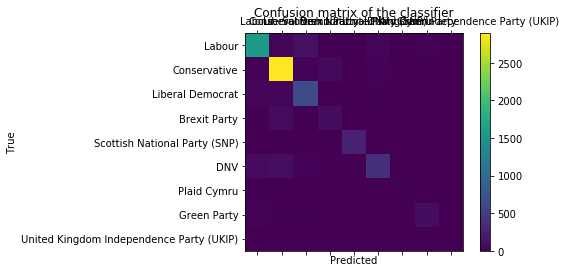

In [16]:
from sklearn import metrics
labels=['Labour', 'Conservative', 'Liberal Democrat', 'Brexit Party', 'Scottish National Party (SNP)', 'DNV', 'Plaid Cymru', 'Green Party', 'United Kingdom Independence Party (UKIP)']
cm = metrics.confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Text(69.0, 0.5, 'Truth')

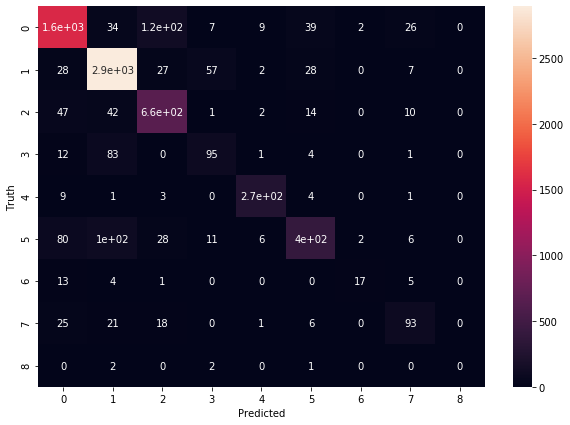

In [17]:
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
y.value_counts(normalize=True)

Conservative                                0.429882
Labour                                      0.269791
Liberal Democrat                            0.114652
DNV                                         0.089456
Scottish National Party (SNP)               0.039926
Green Party                                 0.025411
Brexit Party                                0.024894
Plaid Cymru                                 0.005168
United Kingdom Independence Party (UKIP)    0.000818
Name: actualVote, dtype: float64

In [19]:
actual = y_test.to_numpy()
predict = y_pred

count = 0
con = 0
lab = 0
lib = 0
dnv = 0
snp = 0
green = 0
brexit = 0
plaid = 0
ukip = 0
for i in range(len(predict)):
    if predict[i] != actual[i]:
        if actual[i] == 'Conservative':
            con += 1
            count += 1
        if actual[i] == 'Labour':
            lab += 1
            count += 1
        if actual[i] == 'DNV':
            dnv += 1
            count += 1
        if actual[i] == 'Liberal Democrat':
            lib += 1
            count += 1
        if actual[i] == 'Scottish National Party (SNP)':
            snp += 1
            count += 1
        if actual[i] == 'Green Party':
            green += 1
            count += 1
        if actual[i] == 'Brexit Party':
            brexit += 1
            count += 1
        if actual[i] == 'Plaid Cymru':
            plaid += 1
            count += 1
        if actual[i] == 'United Kingdom Independence Party (UKIP)':
            ukip += 1
            count += 1

print('Voted for this party despite saying they would vote for another:')
print('Con:', con/count)
print('Lab:', lab/count)
print('Lib:', lib/count)
print('DNV:', dnv/count)
print('SNP:', snp/count)
print('Green:', green/count)
print('Brexit:', brexit/count)
print('Plaid:', plaid/count)
print('Ukip:', ukip/count)

Voted for this party despite saying they would vote for another:
Con: 0.1548856548856549
Lab: 0.2515592515592516
Lib: 0.12058212058212059
DNV: 0.24636174636174638
SNP: 0.018711018711018712
Green: 0.07380457380457381
Brexit: 0.104989604989605
Plaid: 0.02390852390852391
Ukip: 0.005197505197505198


In [20]:
num_feat = range(10, 170, 10)
for i in num_feat:
    feature_cols = list(df.columns)
    feature_cols.remove('actualVote')
    X = df[feature_cols] # Features
    y = df.actualVote # Target variable
    X = SelectKBest(chi2, k=i).fit_transform(X, y)
    # # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
    #Create a Classifier
    model = LogisticRegression()
    #Train the model using the training sets
    model.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = model.predict(X_test)
    predictions = [value for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print(i,": Accuracy: %.2f%%" % (accuracy * 100.0))

10 : Accuracy: 81.70%
20 : Accuracy: 85.44%
30 : Accuracy: 85.27%
40 : Accuracy: 85.10%
50 : Accuracy: 85.40%
60 : Accuracy: 85.21%
70 : Accuracy: 85.31%
80 : Accuracy: 85.59%
90 : Accuracy: 85.85%
100 : Accuracy: 85.77%
110 : Accuracy: 86.00%
120 : Accuracy: 85.92%
130 : Accuracy: 85.92%
140 : Accuracy: 85.83%
150 : Accuracy: 85.93%
160 : Accuracy: 86.15%
